In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


Generate Training data

In [2]:
x_train = np.linspace(start=-20, stop=20, num=1000)
y_train = 5 * x_train**3 - 8 * x_train**2 - 7 * x_train + 1

Normalize the training data in the range -1 to +1

In [3]:
x_train_normalized = ((x_train - np.min(x_train)) / (np.max(x_train) - np.min(x_train))) * 2 - 1
y_train_normalized = ((y_train - np.min(y_train)) / (np.max(y_train) - np.min(y_train))) * 2 - 1

Split Data into Train, Validation and Test sets

In [4]:
x_train_full, x_test, y_train_full, y_test = train_test_split(x_train_normalized, y_train_normalized, test_size=0.05, random_state=42)
print(x_train_normalized.shape, y_train_normalized.shape)
print(x_train_full.shape, y_train_full.shape)
print(x_test.shape, y_test.shape)
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.05, random_state=42)
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(1000,) (1000,)
(950,) (950,)
(50,) (50,)
(902,) (902,)
(48,) (48,)


Build and Compile the DNN model

In [42]:
model = Sequential([
    Dense(units=32, input_shape=(1,), activation='sigmoid'),
    Dense(units=64, activation='sigmoid'),
    Dense(units=128, activation='sigmoid'),
    Dense(units=1)
])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                64        
                                                                 
 dense_11 (Dense)            (None, 64)                2112      
                                                                 
 dense_12 (Dense)            (None, 128)               8320      
                                                                 
 dense_13 (Dense)            (None, 1)                 129       
                                                                 
Total params: 10625 (41.50 KB)
Trainable params: 10625 (41.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model

In [43]:
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val), verbose=1)
loss = model.evaluate(x_test, y_test)
y_pred = model.predict(x_test)

Epoch 1/50
29/29 [==============================] - 1s 6ms/step - loss: 0.3988 - accuracy: 0.0000e+00 - val_loss: 0.1570 - val_accuracy: 0.0000e+00
Epoch 2/50
29/29 [==============================] - 0s 2ms/step - loss: 0.1607 - accuracy: 0.0000e+00 - val_loss: 0.1071 - val_accuracy: 0.0000e+00
Epoch 3/50
29/29 [==============================] - 0s 2ms/step - loss: 0.1463 - accuracy: 0.0000e+00 - val_loss: 0.1105 - val_accuracy: 0.0000e+00
Epoch 4/50
29/29 [==============================] - 0s 2ms/step - loss: 0.1422 - accuracy: 0.0000e+00 - val_loss: 0.1100 - val_accuracy: 0.0000e+00
Epoch 5/50
29/29 [==============================] - 0s 2ms/step - loss: 0.1387 - accuracy: 0.0000e+00 - val_loss: 0.1041 - val_accuracy: 0.0000e+00
Epoch 6/50
29/29 [==============================] - 0s 2ms/step - loss: 0.1355 - accuracy: 0.0000e+00 - val_loss: 0.1010 - val_accuracy: 0.0000e+00
Epoch 7/50
29/29 [==============================] - 0s 2ms/step - loss: 0.1326 - accuracy: 0.0000e+00 - val_loss

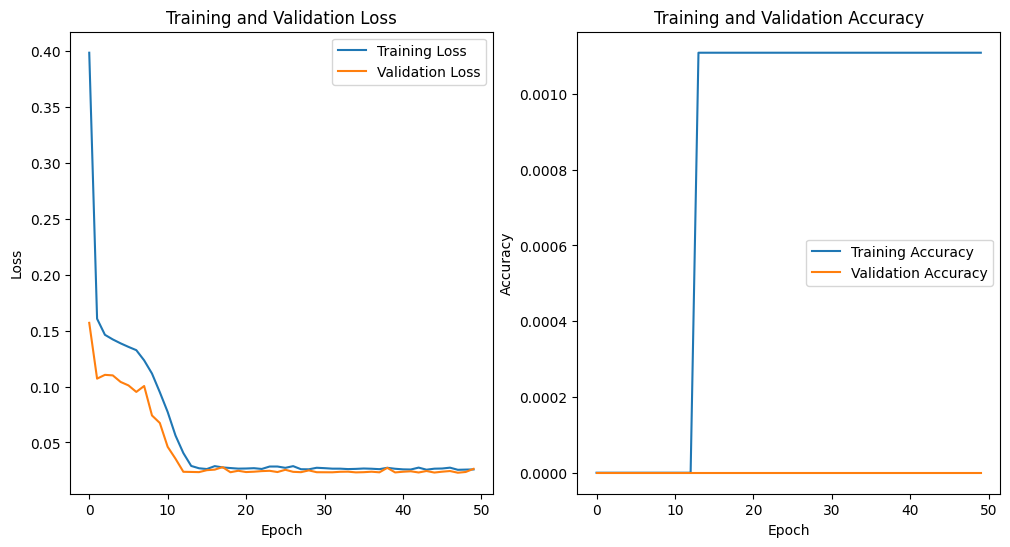

2/2 [==============================] - 0s 0s/step


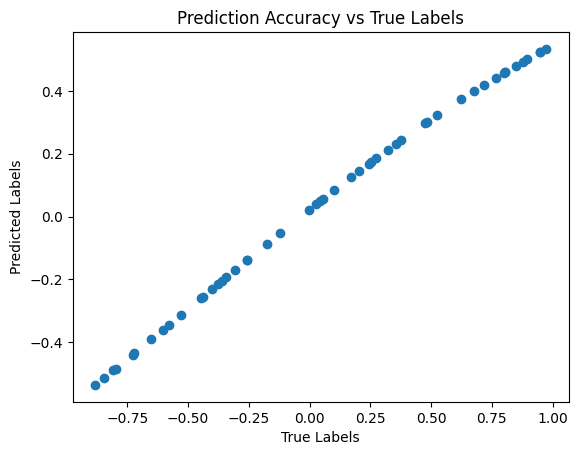

In [45]:
# print('Loss:', loss)
# print(history.history)
# print(len(history.history['loss']))
# print(len(history.history['val_loss']))


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()


y_pred = model.predict(x_test)
plt.scatter(x_test, y_pred)
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('Prediction Accuracy vs True Labels')
plt.show()